# Laboratorio 10 - Modelación y Simulación

#### Integrantes
- **Pablo Orellana** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;21970
- **Diego Leiva** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 21752
- **Gustavo González** &nbsp;&nbsp; 21438



#### Ejercicio 2

El objetivo de este ejercicio es implementar el algoritmo de Metropolis-Hastings para aproximar una distribución normal estándar N(0,1) utilizando una distribución de propuesta uniforme. Luego, se compararán los resultados obtenidos con la verdadera distribución normal. Para ello considere los siguientes pasos

1. Implementa el Algoritmo de Metropolis-Hastings en Python.
2. Utiliza una distribución de propuesta uniforme en el intervalo [−1,1].
3. Realiza al menos 10,000 iteraciones para obtener suficientes muestras.
4. Compara el histograma de las muestras obtenidas con la verdadera distribución normal N(0,1) usando la biblioteca matplotlib.

#### Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Metropolis-Hastings

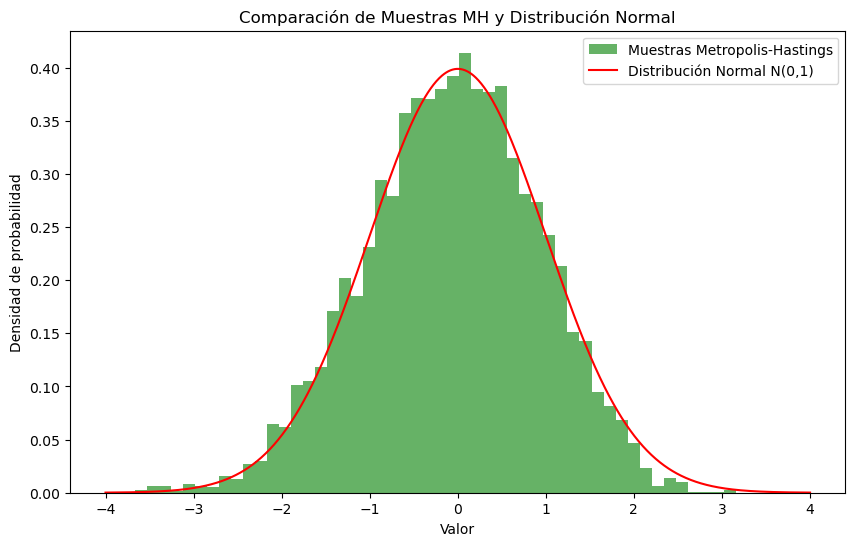

In [3]:
# Definimos la distribución objetivo: N(0,1)
def normal_distribution(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

# Implementación del algoritmo de Metropolis-Hastings
def metropolis_hastings(target_dist, n_samples, proposal_width):
    samples = []
    current_sample = np.random.normal()  # Iniciamos con un valor aleatorio de la distribución normal
    for _ in range(n_samples):
        # Propuesta de un nuevo valor de la distribución uniforme en [-1,1]
        proposed_sample = current_sample + np.random.uniform(-proposal_width, proposal_width)
        # Cálculo de la probabilidad de aceptación
        acceptance_prob = min(1, target_dist(proposed_sample) / target_dist(current_sample))
        # Aceptamos o rechazamos la propuesta
        if np.random.rand() < acceptance_prob:
            current_sample = proposed_sample
        samples.append(current_sample)
    return np.array(samples)

# Parámetros
n_samples = 10000
proposal_width = 1.0

# Generar muestras con el algoritmo de Metropolis-Hastings
samples_mh = metropolis_hastings(normal_distribution, n_samples, proposal_width)

# Comparación con la verdadera distribución normal
x = np.linspace(-4, 4, 1000)
y = normal_distribution(x)

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.hist(samples_mh, bins=50, density=True, alpha=0.6, color='g', label="Muestras Metropolis-Hastings")
plt.plot(x, y, label="Distribución Normal N(0,1)", color="red")
plt.title('Comparación de Muestras MH y Distribución Normal')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()


#### Análisis

1. **Analiza el histograma: Compare las muestras obtenidas con la distribución real superpuesta.**
- Como se puede obervar en la gráfica generada, el histograma de las muestras sigue de manera razonable la forma de la distribución normal, más en la región central alrededor del 0. Esto nos indica que el algoritmo está generando vvalores que se aproximan a la distribución objetivo, pero hay una ligera discrepacincia en las colas, donde parece que no captura la cantidad exacta de valores extremos en comparación con la real.

2. **Reflexione sobre los resultados: ¿Qué observas acerca de la convergencia de las muestras hacia la distribución normal?**
- La convergencia de las muestras hacia la distribución normal es evidente a lo largo de la gráfica, con más énfasis en las regiones centrales, lo que nos dice que el algoritmo ha sido efectivo en aproximarse a la distribución objetivo en un número duficiente de iteraciones. en las colas presentamos menos muestras que lo esperado en la distribución normal, pero puede deberse a que el algoritmo tiende a quedarse atrapado en regiones de alta probabilidad y puede no explorar de manera adecuada las áreas de baja probabilidad.